In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("lab06.ipynb")

<table style="width: 100%;" id="nb-header">
    <tr style="background-color: transparent;"><td>
        <img src="https://data-88e.github.io/assets/images/blue_text.png" width="250px" style="margin-left: 0;" />
    </td><td>
        <p style="text-align: right; font-size: 10pt;"><strong>Economic Models</strong>, Fall 2024<br>
            Dr. Eric Van Dusen <br>
        Alan Liang <br>
        Amal Bhatnagar <br>
        Sreeja Apparaju </p></td></tr>
</table>

# Lab 6: Modeling Income Inequality

In [2]:
from datascience import *
import numpy as np
import matplotlib.pyplot as plt
from sympy import Symbol, integrate
from scipy.optimize import minimize
%matplotlib inline 

def find_k(lnx, lny):
    """Determines the best value for k in the simplified Rao and Tam model.
    
    :param lnx: log of the income percentiles (out of 1)
    :param lny: log of the income shares (out of 1)
    :returns: the best value for k.
    """
    def obj(k):
        return np.mean(np.abs(lny - k*lnx))
    res = minimize(obj, 2.5)
    return res.x[0]

## The Lorenz Curve
There are many mathematical models used to model the Lorenz curve. For this homework, we will work with the simplified Rao-Tam Lorenz curve<sup>1</sup>, as defined by:
$$L(x)=x^k,\quad \text{where} \; k>1$$

<!-- BEGIN QUESTION -->

**Question 1:** Show that the simplified Rao-Tam Lorenz curve model satisfies the conditions for a Lorenz curve. 


The first condition of the Lorenz curve is that it must start at $(0,0)\Rightarrow L(0,0)=0$. The second condition is that it must end at $(1,1)\Rightarrow L(1,1)=1$. The last condition that we need to meet is the convexity requirenment. i.e. the second derivative is greater than 0. To show that the simplified Rao-Tam Lorenz curve model satisfies the first two conditions:
$$
\begin{aligned}
L(x)=x^k\Rightarrow L(0)=0^k = 0 \text{ and } L(1)=(1)^k=1
\end{aligned}
$$
To check the convexity condition, let us to the second-derivative test:
$$
\begin{aligned}
\frac{dL(x)}{dx}&=kx^{k-1}\\
\frac{d^2L(x)}{dx^2}&=k(k-1)x^{k-2}
\end{aligned}
$$
since $k>1$, $\frac{d^2L(x)}{dx^2}=k(k-1)x^{k-2}>0$. Therefore, we have shown that the simplified Rao-Tam Lorenz curve satisfies the conditions for a Lorenz Curve. 


<!-- END QUESTION -->

<!-- END QUESTION -->

### Fitting the Lorenz Curve to Data
Now, let's try to fit this model to the existing US data. From figure 3 of the [2022 *Income in the United States* report](https://www.census.gov/library/publications/2023/demo/p60-279.html), we get:

In [3]:
# Read in and clean the data
# You should understand this code and its implications!
us = Table().read_table("us_income_2022.csv")
us

income_group,income_share
Lowest Quintile,0.03
Second Quintile,0.082
Third Quintile,0.14
Fourth Quintile,0.225
Highest Quintile,0.521


For each row of the table, `income_share` shows the proportion of total income an `income_group` owns. For example, the richest 20% (5th quintile) earned 52.1% of the total national income.

**Question 2.1:**
Let's convert this table to points on the Lorenz curve. Recall that the Lorenz curve's y-axis is the cumulative income share: at the 20th percentile, the total income share is 3.0%, while at the 40th percentile, the total income share is 8.5% + 3.0% = 11.5%. 

*Hint: use `np.cumsum`.*

In [4]:
income_group = [0.2, 0.4, 0.6, 0.8, 1.0] 
cum_income_share = np.cumsum(us.column("income_share"))

us_cumulative = Table().with_columns("income_percentile", income_group, "cum_income_share", cum_income_share)
us_cumulative

income_percentile,cum_income_share
0.2,0.03
0.4,0.112
0.6,0.252
0.8,0.477
1,0.998


In [5]:
grader.check("q2_1")

q2_1 results: All test cases passed!

**Question 2.2:**
In addition, the US census bureau reported that the top 5 percent of income earners' income share was 23.5%. What is the corresponding $(x,y)$ point to this data point? 


In [21]:
x_val = 0.95
y_val = 0.765

In [7]:
grader.check("q2_2")

q2_2 results: All test cases passed!

**Question 2.3:**
Add this pair of coordinates to our table, by appending `income_group` and `cum_income_share` with `x` and `y`.


In [8]:
income_group_with_x = np.sort(np.append(income_group, x_val))
cum_income_share_with_y = np.sort(np.append(cum_income_share, y_val))

us_cumulative_extended = Table().with_columns(
    "income_percentile", income_group_with_x, 
    "cum_income_share", cum_income_share_with_y)
us_cumulative_extended

income_percentile,cum_income_share
0.2,0.03
0.4,0.112
0.6,0.252
0.8,0.477
0.95,0.765
1,0.998


In [9]:
grader.check("q2_3")

q2_3 results: All test cases passed!

**Question 2.4:**
To more easily fit our data, we will take the natural log of the curve to make it linear. Which one of the equations below equals the natural log of the curve?
$$
\begin{aligned}
&(a) &&\ln{y} = k + \ln{x} \\
&(b) &&\ln{x} = k + \ln{y} \\
&(c) &&\ln{y} = k \ln{x} \\
&(d) &&\ln{x} = k \ln{y}
\end{aligned}
$$

Assign the letter corresponding to your answer to `q2_4` below.

In [10]:
q2_4 = "c"

In [11]:
grader.check("q2_4")

q2_4 results: All test cases passed!

**Question 2.5:**
Transform the data and append it to the new table. Use the [`np.log`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.log.html) function.


In [12]:
log_x =  np.log(income_group_with_x)
log_y = np.log(cum_income_share_with_y)
us_log = Table().with_columns("log_income_percentile", log_x, "log_cum_income_share", log_y)
us_log

log_income_percentile,log_cum_income_share
-1.60944,-3.50656
-0.916291,-2.18926
-0.510826,-1.37833
-0.223144,-0.740239
-0.0512933,-0.267879
0,-0.002002


In [13]:
grader.check("q2_5")

q2_5 results: All test cases passed!

<!-- BEGIN QUESTION -->

**Question 2.6:**
Create a scatter plot of this table. Add a line of best fit by setting the `fit_line` parameter to be `True`.


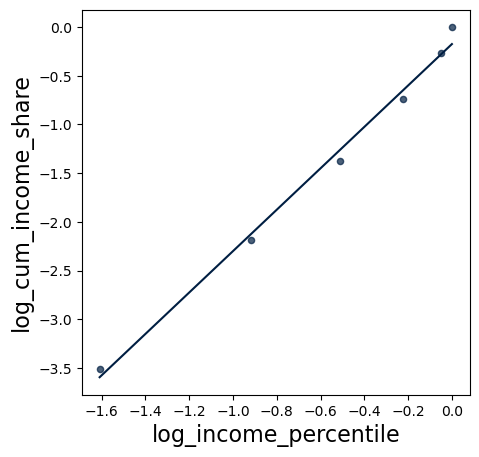

In [14]:
us_log.scatter("log_income_percentile", "log_cum_income_share", fit_line=True)

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 2.7:**
Now it's time to find $k$. Although this function is linear, it does not have an intercept so that the traditional `np.polyfit` method you've seen in previous lectures will not work. Instead, use the custom `find_k` function provided, which will find the best value of $k$. `find_k` takes two arguments: the array $\ln x$ and the array $\ln y$.

In [15]:
k_hat = find_k(log_x, log_y)
k_hat

2.2099223081022501

In [16]:
grader.check("q2_7")

q2_7 results: All test cases passed!

<!-- END QUESTION -->

### Gini Coefficients

Now that we have found $\hat{k}$, let's try to determine its theoretical Gini coefficient. Recall that: 

$$
\begin{aligned}
\text{Gini} &= \frac{\text{Area between line of equality and Lorenz Curve}}{\text{Area under line of equality}} \\
&= \frac{\int_0^1 x \text{d}x - \int_0^1 L(x) \text{d}x}{\int_0^1 x \text{d}x} \\ 
&= 1 - 2\int_0^1 L(x) \text{d}x
\end{aligned}$$

**Question 3.1:**
Calculate the gini coefficient using the formula from the last line above. We will use SymPy to help us integrate the $\int_0^1 L(x) \text{d}x$. In order to integrate something using SymPy, we can use `integrate(f(x), (x, a, b))` where f(x) is the function we want to integrate and a and b are the starting and ending limits of the integral. You can find more information [here](https://docs.sympy.org/latest/modules/integrals/integrals.html).


In [17]:
x = Symbol("x")
area_under_lorenz = integrate(x**k_hat,(x,0,1))
gini = 1-2*area_under_lorenz
gini

0.376931960330707

In [18]:
grader.check("q3_1")

q3_1 results: All test cases passed!

<!-- BEGIN QUESTION -->

**Question 3.2:**
The actual Gini coefficient in 2022 was reported to be 0.488. Is your result different than the reported value? What are some sources of potential error?

Yes it is different. The actual Gini coefficient in 2022 is around 0.111 times higher. Some potential sources of error are using the simplified Rao-Tam model, the sample size might also not be large enough, and overestimation might come into play.

<!-- END QUESTION -->

### Applying to Another Country

Now that you've calculuated the Gini coefficient for the US using the simplified Rao and Tam model, let's redo this for another country. The default country to use is Norway, which can be found in the `norway_income.csv` file. If you would like to instead analyze any other country, you're welcome to do that as well. For example, the income distribution data for European countries can be found [here](https://ec.europa.eu/eurostat/databrowser/view/ilc_di01/default/table). You do not need to read in a csv for this part; feel free to directly copy over the values by hand from the data source. Make sure to use the data for 2022 if possible (to compare to the US data for 2022) and **indicate in your explanation for question 4.2 which country you picked.**

In [19]:
my_country = Table().read_table("norway_income_2022.csv")
my_country

income_group,income_share
Lowest Quintile,0.089
Second Quintile,0.147
Third Quintile,0.179
Fourth Quintile,0.218
Highest Quintile,0.368


<!-- BEGIN QUESTION -->

**Question 4.1:**
What is the Gini coefficient of your chosen country for its most recent year? Include a scatter plot of your logged data.

**Do not overwrite any variables from previous questions** (except `x`). If you overwrite anything, some tests may fail when your assignment is graded.


0.223474992992337

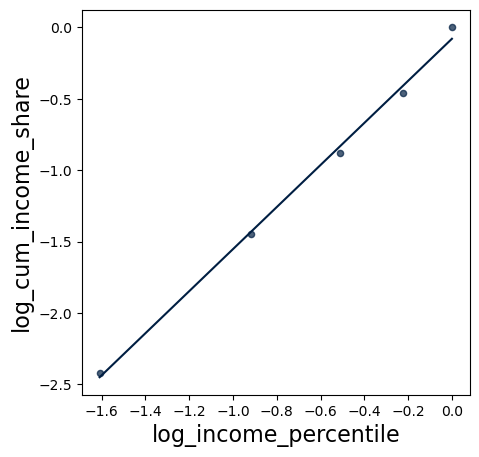

In [20]:
income_group_my_country = [0.2, 0.4, 0.6, 0.8, 1.0] 
cum_income_share_my_country = np.cumsum(my_country.column("income_share"))

my_country_cumulative = Table().with_columns(
    "income_percentile", income_group_my_country, 
    "cum_income_share", cum_income_share_my_country
)

log_x_my_country = np.log(income_group_my_country)
log_y_my_country = np.log(cum_income_share_my_country)

my_country_log = Table().with_columns(
    "log_income_percentile", log_x_my_country, 
    "log_cum_income_share", log_y_my_country
)

# Create scatter plot of log income percentile and log cumulative income share, with fit_line = True
my_country_log.scatter("log_income_percentile", "log_cum_income_share", fit_line=True)

k_hat_my_country = find_k(log_x_my_country, log_y_my_country)
 
x = Symbol("x")
gini_my_country = 1-2*integrate(x**k_hat_my_country,(x,0,1))
gini_my_country

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 4.2:**
How do your results compare with the actual Gini coefficient reported for the country, and does it suggest anything about our model?


0.275 was the Gini Coefficient for Norway in 2022 from https://ec.europa.eu/eurostat/databrowser/view/tessi190/default/table. It may suggest that Rao-Tam does not fully capture our distribution of income accurately enough and indicates that the Rao-Tam model has a downwards bias. 

<!-- END QUESTION -->

---
**References:**
1. Rao & Tam curve https://www.tandfonline.com/doi/ref/10.1080/02664768700000032
2. Income and Poverty in the US https://www.census.gov/library/publications/2019/demo/p60-266.html

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [ ]:
# Save your notebook first, then run this cell to export your submission.
grader.export(run_tests=True)